<a href="https://colab.research.google.com/github/VictoriaReiShiro/Math_Models_In_Python/blob/master/%D0%94%D0%B2%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BB%D0%B0%D0%BD%D0%B5%D1%82_%D0%B2%D0%BE%D0%BA%D1%80%D1%83%D0%B3_%D0%A1%D0%BE%D0%BB%D0%BD%D1%86%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание №1**

dE = 34.898 %


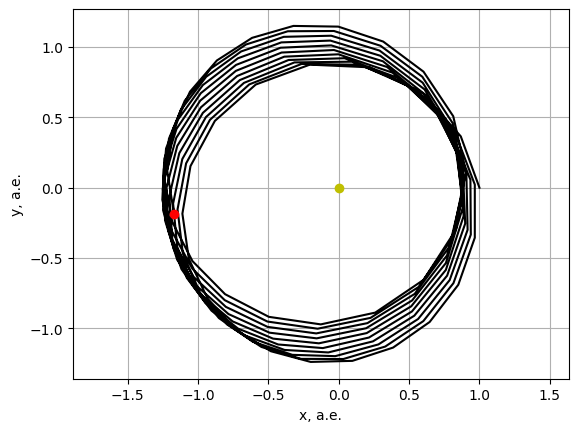

0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция построения графиков
def plot(x, y, ttl=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0, 0, "oy")
    ax.plot(x, y, "-k")
    ax.plot(x[-1], y[-1], "or")
    ax.grid()
    ax.axis("equal")
    ax.set_xlabel("x, a.e.")
    ax.set_ylabel("y, a.e.")
    ax.set_title(ttl)
    plt.show()
    return 0

# Решение дифференциального уравнения
def calc(M, G, tn, nt, xo, yo, vxo, vyo):
    x = np.zeros(nt)
    y = np.zeros(nt)
    vx = np.zeros(nt)
    vy = np.zeros(nt)
    x[0] = xo
    y[0] = yo
    vx[0] = vxo
    vy[0] = vyo
    t = np.linspace(0, tn, nt)
    dt = t[1] - t[0]
    for k in range(1, nt):
        Fx = -G * M * x[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** 3
        Fy = -G * M * y[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** 3
        vx[k] = vx[k - 1] + dt * Fx
        vy[k] = vy[k - 1] + dt * Fy
        x[k] = x[k - 1] + dt * vx[k]
        y[k] = y[k - 1] + dt * vy[k]
    return [t, x, y, vx, vy]

# Основная функция
def main():

    # Гравитационная постоянная
    G = 6.67408

    # Массы объектов
    M = 1.98847
    m = 5.9742 * 10 ** (-6)

    # Время моделирования
    tn = 20

    # Число шагов по времени
    nt =201

    # Начальные координаты объектов в астрономических единицах
    xo = 1
    yo = 0

    # Начальные скорости объектов
    vxo = 0
    vyo = 3.65

    [t, x, y, vx, vy] = calc(M, G, tn, nt, xo, yo, vxo, vyo)
    Eo = m * (vxo**2 + vyo**2) / 2
    E = np.max(m * (vx[1:] ** 2 + vy[1:] ** 2) / 2)
    print(f"dE = {100*np.abs(1-E/Eo):.5} %")

    # Вывод результата
    plot(x, y)
    return 0

main()


**Задание №2**

T = 0.9055
a = 0.65080462
b = 0.5491904


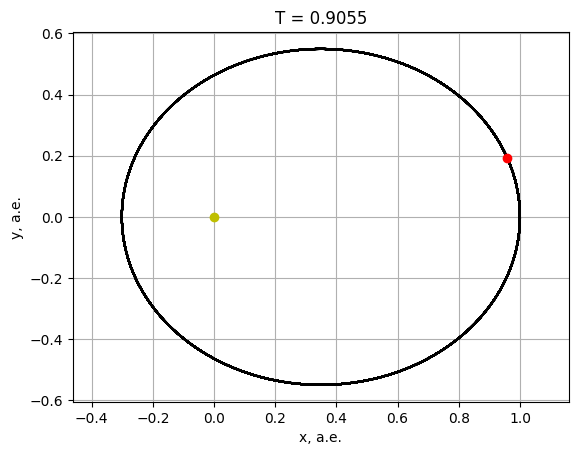

0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функция построения графиков
def plot(x, y, ttl=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0, 0, "oy")
    ax.plot(x, y, "-k")
    ax.plot(x[-1], y[-1], "or")
    ax.grid()
    ax.axis("equal")
    ax.set_xlabel("x, a.e.")
    ax.set_ylabel("y, a.e.")
    ax.set_title(ttl)
    plt.show()
    return 0

# Решение дифференциального уравнения
def calc(M, G, tn, nt, xo, yo, vxo, vyo):
    x = np.zeros(nt)
    y = np.zeros(nt)
    vx = np.zeros(nt)
    vy = np.zeros(nt)
    x[0] = xo
    y[0] = yo
    vx[0] = vxo
    vy[0] = vyo
    t = np.linspace(0, tn, nt)
    dt = t[1] - t[0]
    for k in range(1, nt):
        Fx = -G * M * x[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** 3
        Fy = -G * M * y[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** 3
        vx[k] = vx[k - 1] + dt * Fx
        vy[k] = vy[k - 1] + dt * Fy
        x[k] = x[k - 1] + dt * vx[k]
        y[k] = y[k - 1] + dt * vy[k]
    return [t, x, y, vx, vy]

# Расчет периода обращения
def getT(t, x, y):
    n = len(t)
    T = 0
    for k in range(2, n - 1):
        if x[k] > 0 and y[k] * y[k + 1] <= 0:
            T = (t[k] + t[k + 1]) / 2
            break
    return T

# Расчет малой и большой полуоси
def getAB(t, x, y):
    n = len(t)
    K = 0
    for k in range(2, n - 1):
        if x[k] > 0 and y[k] * y[k + 1] <= 0:
            K = k + 1
            break
    a = (np.max(x[0:K]) - np.min(x[0:K])) / 2
    b = (np.max(y[0:K]) - np.min(y[0:K])) / 2
    return [a, b]

# Основная функция
def main():

    # Гравитационная постоянная
    G = 6.67408

    # Массы объектов
    M = 1.98847
    m = 5.9742 * 10 ** (-6)

    # Время моделирования
    tn = 20

    # Число шагов по времени
    nt = 100001

    # Начальные координаты объектов в астрономических единицах
    xo = 1
    yo = 0

    # Начальные скорости объектов
    vxo = 0
    vyo = 2.48

    [t, x, y, vx, vy] = calc(M, G, tn, nt, xo, yo, vxo, vyo)
    print(f"T = {float(getT(t,x,y)):.8}")
    [a, b] = getAB(t, x, y)
    print(f"a = {float(a):.8}\nb = {float(b):.8}")

    # Вывод результата
    plot(x, y, f"T = {float(getT(t,x,y)):.8}")
    return 0

main()


**Задание №3**

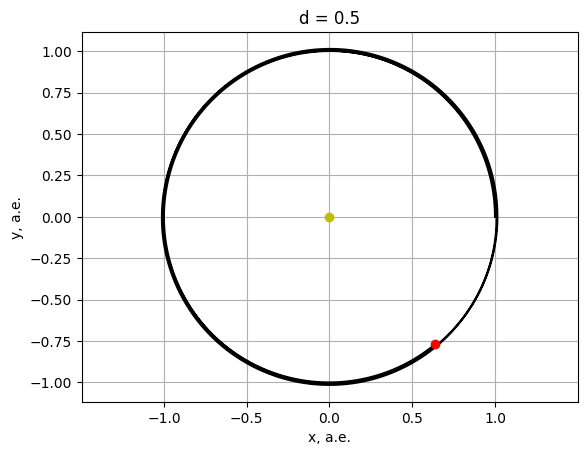

0

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Функция построения графиков
def plot(x, y, ttl=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0, 0, "oy")
    ax.plot(x, y, "-k")
    ax.plot(x[-1], y[-1], "or")
    ax.grid()
    ax.axis("equal")
    ax.set_xlabel("x, a.e.")
    ax.set_ylabel("y, a.e.")
    ax.set_title(ttl)
    plt.show()
    return 0

# Решение дифференциального уравнения
def calc(d, M, G, tn, nt, xo, yo, vxo, vyo):
    x = np.zeros(nt)
    y = np.zeros(nt)
    vx = np.zeros(nt)
    vy = np.zeros(nt)
    x[0] = xo
    y[0] = yo
    vx[0] = vxo
    vy[0] = vyo
    t = np.linspace(0, tn, nt)
    dt = t[1] - t[0]
    for k in range(1, nt):
        Fx = -G * M * x[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** (3 + d)
        Fy = -G * M * y[k - 1] / (np.sqrt(x[k - 1] ** 2 + y[k - 1] ** 2)) ** (3 + d)
        vx[k] = vx[k - 1] + dt * Fx
        vy[k] = vy[k - 1] + dt * Fy
        x[k] = x[k - 1] + dt * vx[k]
        y[k] = y[k - 1] + dt * vy[k]
    return [t, x, y, vx, vy]

# Основная функция
def main():

    # Поправка
    delta = 0.5

    # Гравитационная постоянная
    G = 6.67408

    # Массы объектов
    M = 1.98847
    m = 5.9742 * 10 ** (-6)

    # Время моделирования
    tn = 5

    # Число шагов по времени
    nt = 100001

    # Начальные координаты объектов в астрономических единицах
    xo = 1
    yo = 0

    # Начальные скорости объектов
    vxo = 0
    vyo = 3.65

    [t, x, y, vx, vy] = calc(delta, M, G, tn, nt, xo, yo, vxo, vyo)

    # Вывод результата
    plot(x, y, f"d = {delta}")
    return 0

main()
